<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Evaluating K-Means Clusters with the Iris Dataset

_Authors: Joseph Nelson (DC)_

---

Below you will practice using K-Means clustering and the various evaluation strategies we covered on the famous Iris dataset.

In [11]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn import cluster, metrics, preprocessing
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot') 
from sklearn import datasets
import seaborn as sns

### 1: Import and format the data

Both sklearn and seaborn have ways to import the iris data:
- `sklearn.datasets.load_iris()`
- `sns.load_dataset("iris")`

The seaborn way is easier.

In [22]:
# A:
data = sns.load_dataset("iris")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### 2. Plot the data to visually estimate to correct number of clusters

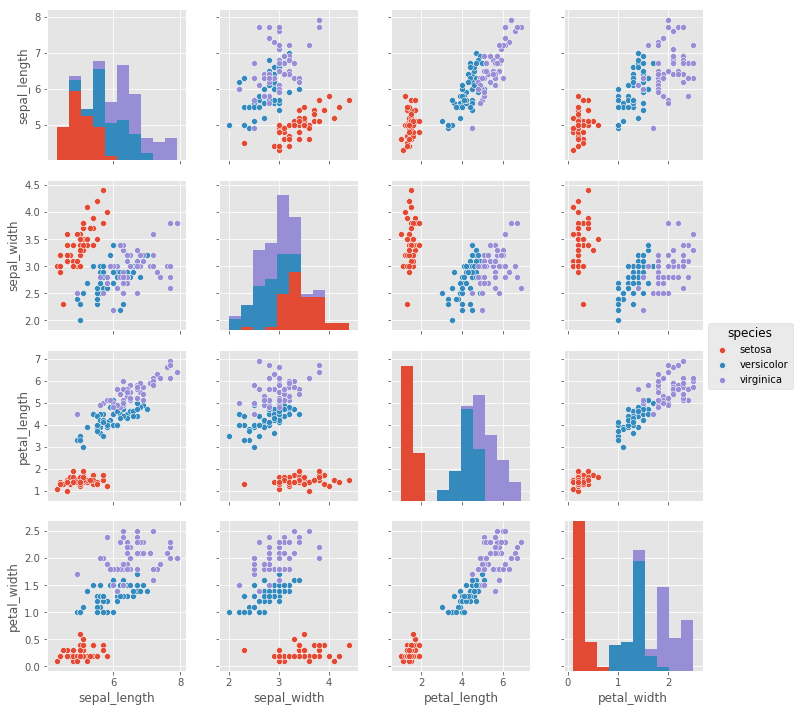

In [9]:
# A:
sns.pairplot(data, hue='species')

### 3. Cluster the data using K-Means

- Select a number of clusters of your choice based on your visual analysis above.

In [12]:
# A:
k = 3
X_scaled = preprocessing.MinMaxScaler().fit_transform(data.drop('species',axis=1))
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(X_scaled)
inertia = kmeans.inertia_
silhouette = metrics.silhouette_score(X_scaled, kmeans.labels_)

**3.2 Compute the labels and centroids.**

In [15]:
# A:
label = kmeans.labels_
centroids = kmeans.cluster_centers_

In [16]:
centroids

array([[0.44125683, 0.30737705, 0.57571548, 0.54918033],
       [0.19611111, 0.595     , 0.07830508, 0.06083333],
       [0.70726496, 0.4508547 , 0.79704476, 0.82478632]])

### 4. Visually evaluate the clusters.
- Compare the predicted labels vs. the actual labels.

In [25]:
type(label)

numpy.ndarray

In [27]:
label_df = pd.DataFrame(label, columns=['label'])

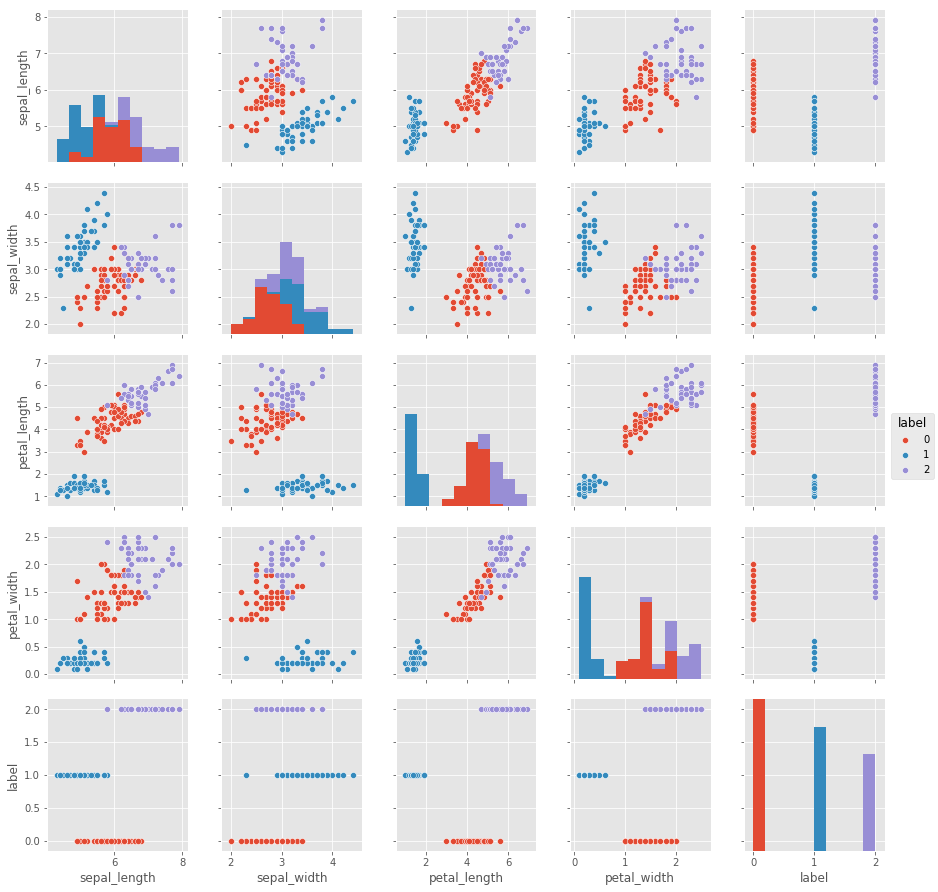

In [30]:
# A:
data['label'] = label_df['label']
sns.pairplot(data.drop('species', axis=1), hue='label')

### 5. Check the centroids and plot them along two of the features.

In [43]:
data

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [48]:
centroids[:]

array([[0.44125683, 0.30737705, 0.57571548, 0.54918033],
       [0.19611111, 0.595     , 0.07830508, 0.06083333],
       [0.70726496, 0.4508547 , 0.79704476, 0.82478632]])

In [49]:
centroids[:,3]

array([0.54918033, 0.06083333, 0.82478632])

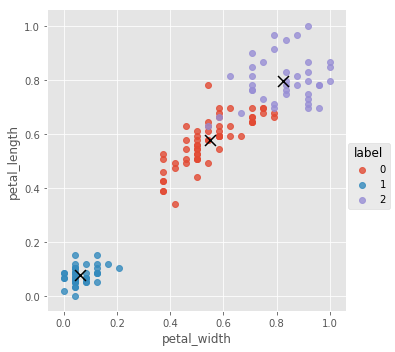

In [52]:
# A:
X_scaled_df = pd.DataFrame(X_scaled, columns=data.columns[:-2])
X_scaled_df['label'] = label_df['label']

sns.lmplot(x='petal_width', y='petal_length', data=X_scaled_df, hue='label', fit_reg=False)
plt.scatter(centroids[:,3], centroids[:,2], marker='x', s=120, c='black')

### 6. Compute the silhoutte score for your clusters.

What does the score indicate?

In [56]:
# A:
metrics.silhouette_score(X_scaled, label, metric='euclidean')

0.5047687565398588

It's pretty good :P

### 7. Plot the silhouette score for K = 2,3,4,5,6,7,8

You will need to fit a new model for each one. You can standardize your data before iterating through the clusters or not, up to you.

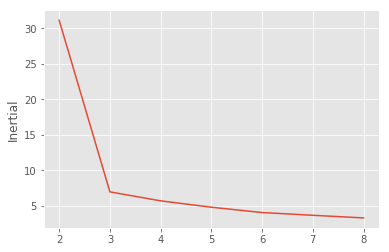

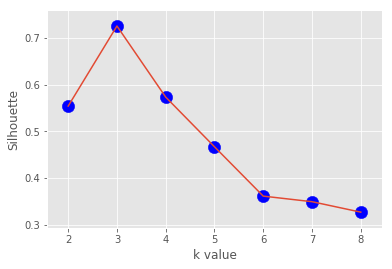

In [61]:
# A:
inertias = []
silhouettes = []

for i in range(2,9):
    X_scaled = preprocessing.MinMaxScaler().fit_transform(data.drop('species',axis=1))
    kmeans = cluster.KMeans(n_clusters=i)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouettes.append(metrics.silhouette_score(X_scaled, kmeans.labels_))
    
plt.plot(range(2,9),inertias)
plt.ylabel('Inertial')
plt.show()

plt.plot(range(2,9),silhouettes)
plt.scatter(range(2,9), silhouettes, c='blue', s=150)
plt.ylabel('Silhouette')
plt.xlabel('k value')
plt.show()

### 8. Plot the inertia score for the different K clusters.

Is there an "elbow" to select a good number of clusters or not?

In [10]:
# A: See above

### 9. Fit a K-Means with 3 clusters and pull out the cluster labels. Pull out the true labels as well.

Once you have both, adjust the predicted cluster labels to correspond to the true labels. For example, cluster 0 should correspond roughly to species 0, cluster 1 to species 1, and cluster 2 to species 2.

In [11]:
# A: Done

### 10. Calculate the completeness, homogeneity, V measure, and mutual information (adjusted) using the predicted clusters and the true labels.

In [12]:
# A: 

Kmeans is easy to run, but some of the pitfalls are:
- 'k' is subjective
- Not necessarily the best method for really dense data sets (unclear clusters)